In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images

plt.show()


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
# from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

plt.figure(figsize=(364,364))
test_folder = r'gdrive/MyDrive/full_data/left'
'''for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path, cv2.IMREAD_GRAYSCALE)
    thresh, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)'''

IMG_WIDTH=364
IMG_HEIGHT=364
img_folder=r'drive/MyDrive/full_data'

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

img_data, class_name =create_dataset(r'drive/MyDrive/full_data')

<Figure size 26208x26208 with 0 Axes>

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
print(target_dict)

{'left': 0, 'right': 1, 'straight': 2}


In [ ]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
print(target_val)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
import random

# make it in the right format for CNN
X = img_data
Y = target_val

print(len(img_data))

indices = []
for i in range(160):
  indices.append(i)

random.shuffle(indices)

print(indices)

160
[74, 121, 30, 2, 86, 75, 4, 39, 15, 157, 79, 109, 34, 140, 61, 35, 18, 46, 90, 11, 72, 138, 116, 130, 156, 27, 144, 123, 143, 6, 45, 111, 88, 83, 84, 94, 21, 91, 154, 10, 60, 47, 106, 59, 112, 69, 55, 5, 133, 129, 119, 158, 128, 77, 67, 139, 115, 127, 56, 95, 98, 62, 102, 33, 25, 78, 120, 153, 155, 99, 135, 105, 150, 96, 36, 101, 82, 152, 114, 71, 107, 136, 73, 122, 103, 37, 51, 89, 85, 0, 17, 126, 31, 141, 32, 110, 113, 63, 147, 23, 19, 148, 13, 159, 151, 53, 92, 142, 125, 124, 65, 81, 50, 145, 80, 20, 26, 70, 134, 42, 8, 57, 146, 1, 137, 118, 12, 100, 40, 93, 58, 24, 54, 43, 132, 97, 64, 14, 108, 16, 29, 68, 44, 52, 38, 104, 28, 41, 3, 87, 7, 22, 9, 149, 131, 76, 48, 117, 66, 49]


In [ ]:
# 100 images train, 44 images test
trainX = []
trainY = []

testX = []
testY = []

for i in range(112):
  trainX.append(X[indices[i]])
  trainY.append(Y[indices[i]])

for i in range(112, 160):
  testX.append(X[indices[i]])
  testY.append(Y[indices[i]])

In [ ]:
#trainX = trainX.reshape((tf.convert_to_tensor(trainX).shape[0], 28, 28, 1))
#testX = testX.reshape((tf.convert_to_tensor(testX).shape[0], 28, 28, 1))

trainX = tf.convert_to_tensor(trainX)
trainX = trainX.numpy()
testX = tf.convert_to_tensor(testX)
testX = testX.numpy()

trainX = trainX.reshape((trainX.shape[0], 364, 364, 1))
testX = testX.reshape((testX.shape[0], 364, 364, 1))

print(trainX.shape)
print(testX.shape)

(112, 364, 364, 1)
(48, 364, 364, 1)


In [ ]:
# one hot encode target values
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [ ]:
# normalize train data
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [ ]:
def load_dataset():
  img_data, class_name =create_dataset(r'drive/MyDrive/full_data')
  target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

  # make it in the right format for CNN
  X = img_data
  Y = target_val

  indices = []
  for i in range(160):
    indices.append(i)

  random.shuffle(indices)

  trainX = []
  trainY = []

  testX = []
  testY = []

  for i in range(112):
    trainX.append(X[indices[i]])
    trainY.append(Y[indices[i]])

  for i in range(112, 160):
    testX.append(X[indices[i]])
    testY.append(Y[indices[i]])
  
  trainX = tf.convert_to_tensor(trainX)
  trainX = trainX.numpy()
  testX = tf.convert_to_tensor(testX)
  testX = testX.numpy()

  trainX = trainX.reshape((trainX.shape[0], 364, 364, 1))
  testX = testX.reshape((testX.shape[0], 364, 364, 1))

  print(trainX.shape)
  print(testX.shape)

  # one hot encode target values
  trainY = tf.keras.utils.to_categorical(trainY)
  testY = tf.keras.utils.to_categorical(testY)

  return trainX, trainY, testX, testY

# New Section

In [ ]:
'''
# load dataset
(trX, trY), (teX, teY) = mnist.load_data()
print(trX.shape)
# reshape dataset to have a single channel
trX = trX.reshape((trX.shape[0], 28, 28, 1))
#testX = testX.reshape((testX.shape[0], 28, 28, 1))
print(trX.shape)
'''

'\n# load dataset\n(trX, trY), (teX, teY) = mnist.load_data()\nprint(trX.shape)\n# reshape dataset to have a single channel\ntrX = trX.reshape((trX.shape[0], 28, 28, 1))\n#testX = testX.reshape((testX.shape[0], 28, 28, 1))\nprint(trX.shape)\n'

In [ ]:
'''
# one hot encode target values
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)
'''

'\n# one hot encode target values\ntrainY = tf.keras.utils.to_categorical(trainY)\ntestY = tf.keras.utils.to_categorical(testY)\n'

In [ ]:
'''
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = tf.keras.utils.to_categorical(trainY)
	testY = tf.keras.utils.to_categorical(testY)
	return trainX, trainY, testX, testY
'''

'\ndef load_dataset():\n\t# load dataset\n\t(trainX, trainY), (testX, testY) = mnist.load_data()\n\t# reshape dataset to have a single channel\n\ttrainX = trainX.reshape((trainX.shape[0], 28, 28, 1))\n\ttestX = testX.reshape((testX.shape[0], 28, 28, 1))\n\t# one hot encode target values\n\ttrainY = tf.keras.utils.to_categorical(trainY)\n\ttestY = tf.keras.utils.to_categorical(testY)\n\treturn trainX, trainY, testX, testY\n'

In [ ]:
'''
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
'''

"\n# convert from integers to floats\ntrain_norm = trainX.astype('float32')\ntest_norm = testX.astype('float32')\n# normalize to range 0-1\ntrain_norm = train_norm / 255.0\ntest_norm = test_norm / 255.0\n"

In [ ]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
# define cnn model
def define_model():
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(364, 364, 1)))
	model.add(tf.keras.layers.MaxPooling2D((2, 2)))
	model.add(tf.keras.layers.Flatten())
	model.add(tf.keras.layers.Dense(130, activation='relu', kernel_initializer='he_uniform'))
	model.add(tf.keras.layers.Dense(3, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# evaluate a model using k-fold cross-validation
from sklearn.model_selection import KFold

def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	ticks = [num/10 for num in range(1, 10)]	
	y = [num for num in range(1, 10)]
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		#plt.figure().set_figheight(5)
		# plot accuracy
		fig, ax = plt.subplots()
		plt.subplot(2, 1, 2)
		ax.set_ylabel('Accuracy (%)')
		ax.set_xlabel('Training iterations')
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		plt.axis()
		#plt.figure().set_figheight(5)
		#plt.yticks(y, ticks)


	plt.show()


In [ ]:
# summarize model performance
import statistics

def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (statistics.mean(scores)*100, statistics.std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
  print("loading dataset")
  trainX, trainY, testX, testY = load_dataset()

	# prepare pixel data
  print("prep pixels")
  trainX, testX = prep_pixels(trainX, testX)

	# evaluate model
  print("evaluate model")
  scores, histories = evaluate_model(trainX, trainY)

	# learning curves
  print("summarize diagnostics")
  summarize_diagnostics(histories)
 
	# summarize estimated performance
  summarize_performance(scores)

loading dataset
(112, 364, 364, 1)
(48, 364, 364, 1)
prep pixels
evaluate model
> 52.174
> 43.478
> 63.636
> 50.000
> 36.364
summarize diagnostics


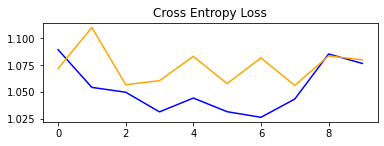

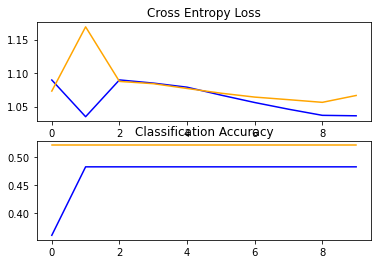

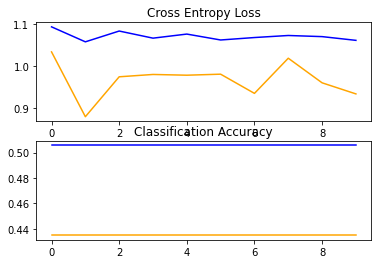

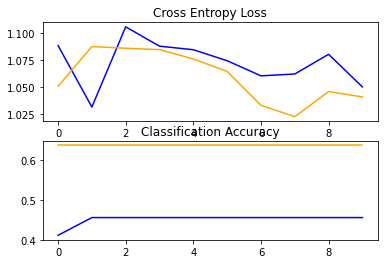

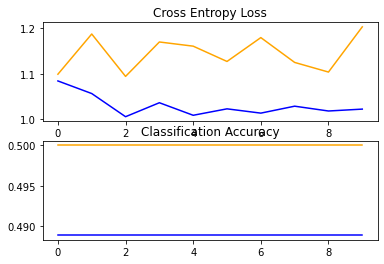

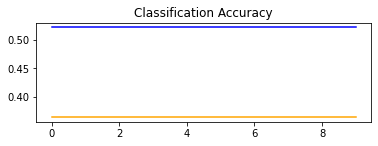

AttributeError: ignored

In [ ]:
run_test_harness()